In [25]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

# Fit folder
FitFolder = "/Users/s2569857/Codes/NTK-interface/Results/LargeNet_1000"

In [26]:
# Data
with open(FitFolder + "/Data.yaml", "r") as data:
    Data = yaml.load(data, Loader=yaml.CLoader)
    x = np.array([val["Value"][0] for val in Data["Independent variables"]])
    y = np.array([val["Value"][0] for val in Data["Dependent variables"]])
    t = np.array([val["Truth"][0] for val in Data["Dependent variables"]])
    
with open(FitFolder + "/output/Output_3.yaml", "r") as out:
    Out = yaml.load(out, Loader=yaml.CLoader)
    nn = np.array([val["Value"][0] for val in Out["Dependent variables"]])

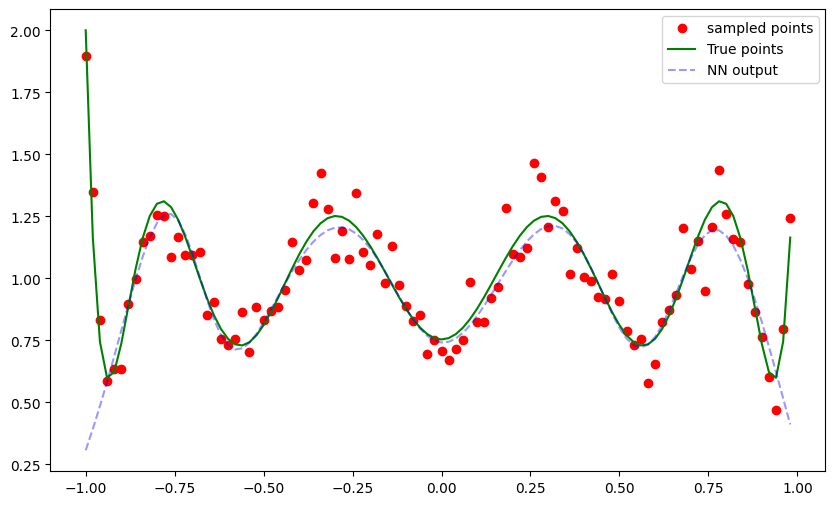

In [27]:
f, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(x, y, marker='o', ls = "", color='red', label='sampled points')
ax.plot(x, t, ls = "-", color='green', label="True points")
ax.plot(x, nn, ls = "--", color='blue', alpha=0.4, label='NN output')
ax.legend()

In [ ]:
with open(FitFolder + "/meta.yaml", "r") as meta:
    Meta = yaml.load(meta, Loader=yaml.CLoader)
    nsteps = Meta["max_num_iterations"]
    ndata = Meta["Ndata"]

step_size_to_store = 10
NTK_frob_norms = np.zeros(int(nsteps /step_size_to_store))
NTK_frob_norms_std = np.zeros(int(nsteps /step_size_to_store))
time = np.array([t for t in range(1, nsteps, step_size_to_store)])
nrep = 0

for frep in [f.replace(".yaml", "") for f in sorted(listdir(FitFolder + "/log/"),  key=lambda s: int(s[s.find("_")+1:s.find(".")]))]:
    with open(FitFolder + "/log/" + frep + ".yaml", "r") as rep:
        Rep = yaml.load(rep, Loader=yaml.CLoader)
        for k,t in enumerate(range(1, nsteps, step_size_to_store)):
            # Retrieve NTK vector for each replica and put in matrix format
            #temp = np.linalg.norm(Rep[t]["NTK"])
            #NTK_frob_norms[k] += Rep[t]["NTK"][0]
            #NTK_frob_norms_std[k] += np.power(Rep[t]["NTK"][0], 2)
            NTK_frob_norms[k] += np.linalg.norm(Rep[t]["NTK"])
            NTK_frob_norms_std[k] += np.power(np.linalg.norm(Rep[t]["NTK"]), 2)
            
    nrep += 1

In [ ]:
NTK_frob_norms /= nrep
NTK_frob_norms_std /= nrep
NTK_frob_norms_std -= np.power(NTK_frob_norms, 2)

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,6))
#ax.plot( NTK_frob_norms, 'bo', )
ax.errorbar(time, NTK_frob_norms, yerr = NTK_frob_norms_std, fmt='o', capsize=6)

ax.set_xlabel(r"time steps", fontsize=15)
ax.set_ylabel(r"$||H ||_F$", fontsize=15)
ax.set_title("Frobenius norm of the NTK as a function of time")

plt.show()

In [ ]:
def P10(x):
    return (1. / 256) * (46189 * np.power(x, 10) - 109395 * np.power(x, 8) + 90090 * np.power(x, 6) - 30030 * np.power(x, 4) + 3465 * np.power(x, 2) - 63)

In [ ]:
f, ax = plt.subplots(1,1)
ax.plot(x,y)
#real = [P(input) for x in ]
ax.plot(x, P10(x) + 1)